# WITH SEABORN

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.shape

(2535, 14)

In [5]:
kill.dropna(inplace=True)

In [6]:
kill.shape

(2254, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [7]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [8]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

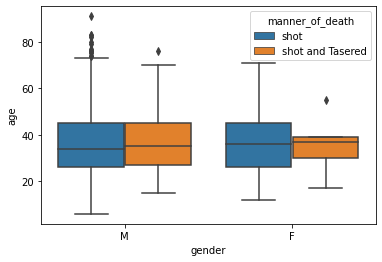

In [9]:
# with seaborn
sns.boxplot(x = "gender", y = "age" , data = kill, hue="manner_of_death")
plt.show()

## 1b: Swarm Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

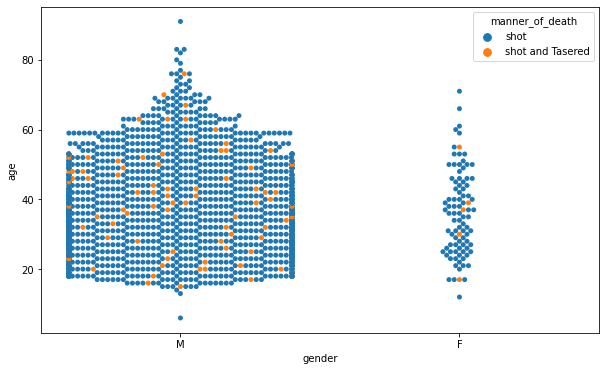

In [10]:
# with seaborn
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x = "gender", y = "age" , data = kill, hue="manner_of_death")
plt.show()


## 2: Plot 12 most dangerous cities

In [11]:
dancity = kill.city.value_counts()[:12]
dancity

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
San Antonio      15
Miami            15
St. Louis        14
Indianapolis     14
Oklahoma City    13
Name: city, dtype: int64

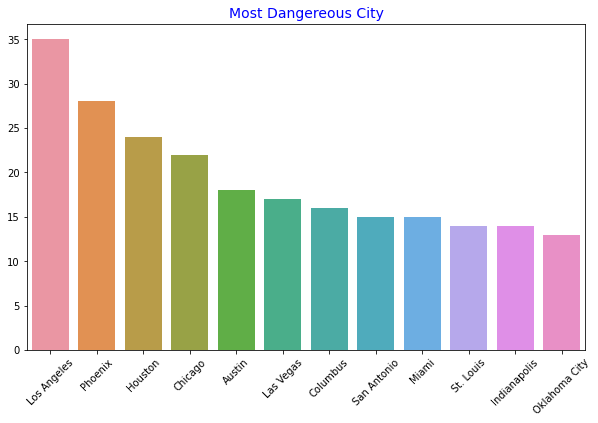

In [13]:
# with seaborn barplot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = dancity.index, y = dancity.values)
ax.set_xticklabels(dancity.index, rotation =45)
ax.set_title("Most Dangereous City", color = "b", fontsize=14)
plt.show()

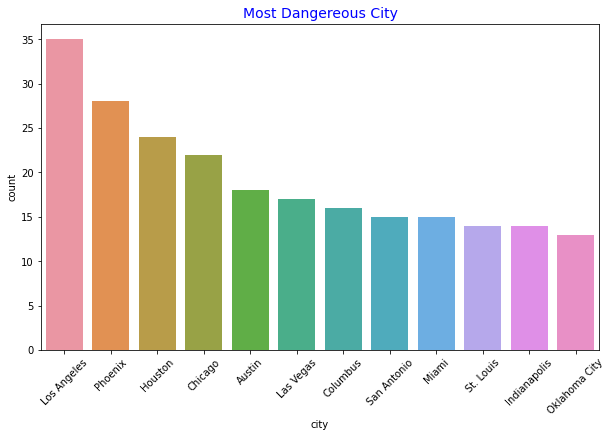

In [14]:
# with seaborn countplot
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x = "city", data = kill, order = dancity.index)
ax.set_xticklabels(dancity.index, rotation =45)
ax.set_title("Most Dangereous City", color = "b", fontsize=14)
plt.show()

## 3: Plot 20 most dangerous states

In [15]:
dng_state =kill.state.value_counts()[:20]
dng_state

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

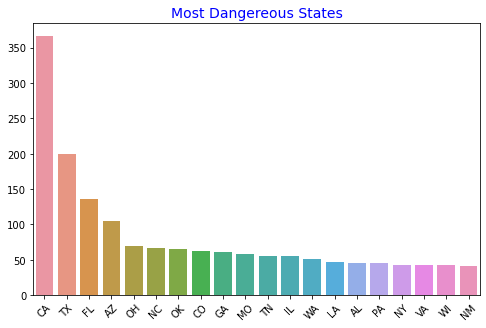

In [16]:
# with seaborn barplot
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x = dng_state.index, y = dng_state.values)
ax.set_xticklabels(dng_state.index, rotation =45)
ax.set_title("Most Dangereous States", color = "b", fontsize=14)
plt.show()


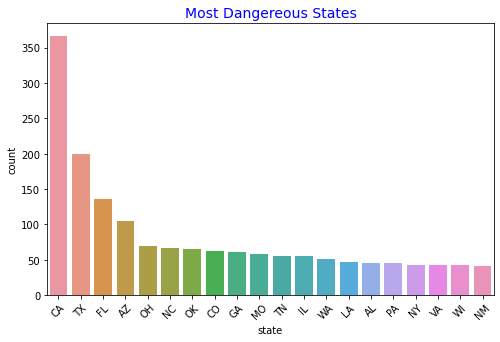

In [17]:
# with seaborn countplot
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x = "state", data = kill, order = dng_state.index)
ax.set_xticklabels(dng_state.index, rotation =45)
ax.set_title("Most Dangereous States", color = "b", fontsize=14)
plt.show()

## 4: Plot Having mental ilness or not for killed people

In [18]:
mental_illness = kill.signs_of_mental_illness.value_counts()
mental_illness

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

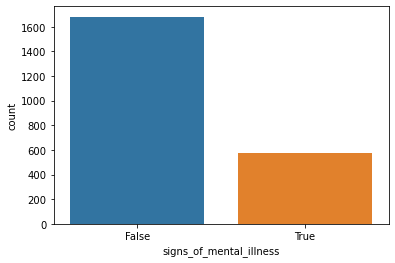

In [47]:
# with seaborn 
sns.countplot(kill.signs_of_mental_illness)
plt.show()

## 5: Plot number of Threat Types

In [51]:
threat_type = kill.threat_level.value_counts()
threat_type

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

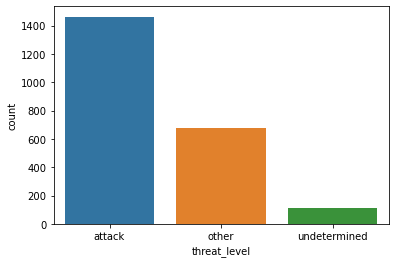

In [53]:
# with seaborn
sns.countplot(kill.threat_level)
plt.show()

## 6: Plot number of Flee Types

In [56]:
flee = kill.flee.value_counts()
flee

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

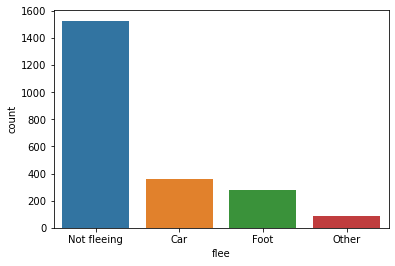

In [57]:
# with seaborn
#solution_1
sns.countplot(kill.flee)
plt.show()

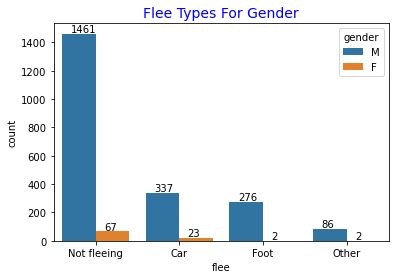

In [19]:
# Extra Solution Exercises

fig, ax = plt.subplots()
sns.countplot(x = kill.flee, data = kill, hue = "gender")
ax.set_title("Flee Types For Gender", color = "b", fontsize=14)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));